# Example of a PAGES2k query and data transformation

For integration into ClimateDisk, we need to be able to query from the LinkedEarth GraphDB directly and create a pickle file that cfr will like. 

In [2]:
import json
import requests
import pandas as pd
import io
import ast
import numpy as np
import cfr

## Example pickle file

In [3]:
df_pickle = pd.read_pickle('data/pages2k_dataset.pkl')
df_pickle

,paleoData_pages2kID,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_proxy
0,NAm_153,NAm-Bennington.Luckman.2001,tree,1850.0,52.7,-118.3,"[1563.0, 1564.0, 1565.0, 1566.0, 1567.0, 1568....",AD,trsgi,NA,"[0.883, 0.942, 1.043, 0.945, 1.141, 0.715, 0.6...",TRW
1,Asi_245,Asi-SouthChina.Wang.1998,documents,2200.0,23.0,114.0,"[1500.0, 1510.0, 1520.0, 1530.0, 1540.0, 1550....",AD,temperature,index,"[0.157429639092533, -0.118646665464906, 0.3035...",historic
2,NAm_165,NAm-RedMountainPassSilverton.Graybill.1994,tree,3400.0,37.9,-107.7,"[1626.0, 1627.0, 1628.0, 1629.0, 1630.0, 1631....",AD,MXD,NA,"[1.071, 1.014, 1.014, 0.966, 1.005, 1.072, 1.0...",MXD
3,Asi_178,Asi-BURGPW.PAGES2k.2013,tree,2500.0,28.77,83.73,"[1303.0, 1304.0, 1305.0, 1306.0, 1307.0, 1308....",AD,trsgi,NA,"[0.889, 0.788, 0.836, 0.741, 0.613, 0.732, 0.7...",TRW
4,Asi_174,Asi-NEPA029.Krusic.2013,tree,4000.0,28.18,85.43,"[1559.0, 1560.0, 1561.0, 1562.0, 1563.0, 1564....",AD,trsgi,NA,"[1.172, 1.21, 1.145, 1.307, 1.368, 1.37, 1.152...",TRW
...,...,...,...,...,...,...,...,...,...,...,...,...
687,Asi_201,Asi-PAKI030.Cook.2013,tree,3630.0,35.88,74.18,"[1574.0, 1575.0, 1576.0, 1577.0, 1578.0, 1579....",AD,trsgi,NA,"[1.212, 0.873, 0.859, 0.968, 0.737, 0.956, 0.8...",TRW
688,Asi_179,Asi-NEPA021.Krusic.2013,tree,3400.0,27.5,88.02,"[1525.0, 1526.0, 1527.0, 1528.0, 1529.0, 1530....",AD,trsgi,NA,"[1.316, 1.139, 1.224, 1.416, 1.305, 1.259, 1.2...",TRW
689,Arc_014,Arc-LakeLehmilampi.Haltia-Hovi.2007,lake sediment,95.0,63.62,29.1,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",AD,thickness,mm,"[-1.3, -0.84, -0.43, -0.69, -0.51, -0.51, -0.5...",varve thickness
690,Ocn_071,Ocn-Guadeloupe.Steinhilber.2010,coral,-1.7,16.2,-61.49,"[1999.21, 1999.13, 1999.04, 1998.96, 1998.88, ...",AD,d18O,permil,"[-4.083, -4.08167, -4.08033, -4.079, -4.24967,...",d18O


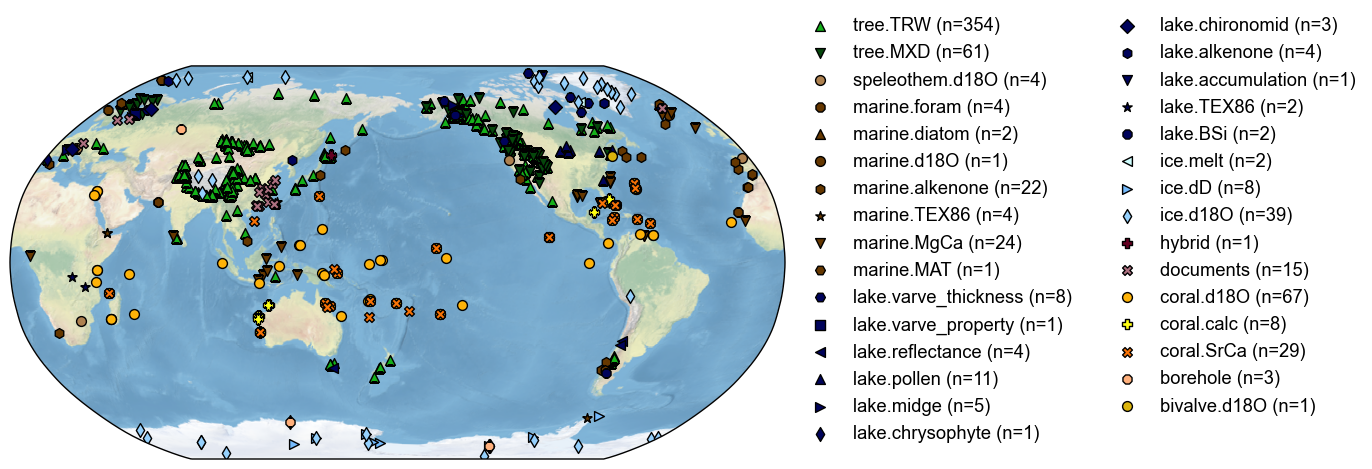

In [11]:
pdb = cfr.ProxyDatabase().from_df(df_pickle)
fig, ax = pdb.plot()

Let's get the name of the columns

In [4]:
list(df_pickle.columns)

['paleoData_pages2kID',
 'dataSetName',
 'archiveType',
 'geo_meanElev',
 'geo_meanLat',
 'geo_meanLon',
 'year',
 'yearUnits',
 'paleoData_variableName',
 'paleoData_units',
 'paleoData_values',
 'paleoData_proxy']

In [5]:
df_pickle[df_pickle['dataSetName']=='Ant-WDC05A.Steig.2013']

,paleoData_pages2kID,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_proxy
158,Ant_006,Ant-WDC05A.Steig.2013,glacier ice,1806.0,-79.46,-112.09,"[2005.0, 2004.0, 2003.0, 2002.0, 2001.0, 2000....",AD,d18O,permil,"[-33.32873325, -35.6732, -33.1574, -34.2854, -...",d18O


## Using the graphDatabase

Create the query (note some fields have been altered following legacy code from the original LinkedEarth work; we need to fix this):

In [10]:
url = 'https://linkedearth.graphdb.mint.isi.edu/repositories/LiPDVerse'

query = """PREFIX le: <http://linked.earth/ontology#>
SELECT ?dsname ?val ?timeval ?archive ?pages2kID ?timeunits ?varname ?varunits ?lat ?lon ?alt ?proxysensor ?proxyobs 
FROM <http://linked.earth/lipd/Pages2k2_1_2> WHERE { 
	?ds le:includesPaleoData ?data .
    ?ds le:name ?dsname .
    ?ds le:proxyArchiveType ?archive .
    
    ?ds  le:collectedFrom ?loc .
    ?loc le:wgs84_Lat ?lat .
    ?loc le:wgs84_Long ?lon .
    ?loc le:wgs84_Alt ?alt .

	?data le:foundInMeasurementTable ?table .
	?table le:includesVariable ?var .

    ?var le:name ?varname .     
    ?var le:useInGlobalTemperatureAnalysis true .
    ?var le:pages2kID ?pages2kID .    
    ?var le:hasValues ?val .    
    OPTIONAL { ?var le:hasUnits ?varunits } .
    OPTIONAL {
        ?var le:hasProxySystem ?proxysystem .
        ?proxysystem le:proxySensorType ?proxysensor .
        ?proxysystem le:proxyObservationType ?proxyobs .
    }    

    ?table le:includesVariable ?timevar .
    ?timevar le:name ?timevarname .
    VALUES ?timevarname {"year" "age"} .
    ?timevar le:hasValues ?timeval .
    ?timevar le:hasUnits ?timeunits .
}"""

In [11]:
response = requests.post(url, data = {'query': query})

In [12]:
data = io.StringIO(response.text)
df = pd.read_csv(data, sep=",")

df

,dsname,val,timeval,archive,pages2kID,timeunits,varname,varunits,lat,lon,alt,proxysensor,proxyobs
0,Ant-WDC05A.Steig.2013,"[-33.32873325, -35.6732, -33.1574, -34.2854, -...","[2005, 2004, 2003, 2002, 2001, 2000, 1999, 199...",glacier ice,Ant_006,AD,d18O,permil,-79.46,-112.09,1806.0,D18ODefaultSensor,D18O
1,NAm-MtLemon.Briffa.2002,"[0.968, 0.962, 1.013, 0.95, 1.008, 0.952, 1.02...","[1568, 1569, 1570, 1571, 1572, 1573, 1574, 157...",tree,NAm_107,AD,MXD,NaN,32.50,-110.80,2700.0,MXDDefaultSensor,MXD
2,Arc-Arjeplog.Bjorklund.2014,"[-0.829089212152348, -0.733882889924006, -0.89...","[1200, 1201, 1202, 1203, 1204, 1205, 1206, 120...",tree,Arc_065,AD,density,NaN,66.30,18.20,800.0,DeltaDensityDefaultSensor,DeltaDensity
3,Asi-CHIN019.Li.2010,"[1.465, 1.327, 1.202, 0.757, 1.094, 1.006, 1.2...","[1509, 1510, 1511, 1512, 1513, 1514, 1515, 151...",tree,Asi_041,AD,trsgi,NaN,29.15,99.93,2150.0,TRWDefaultSensor,TRW
4,NAm-Landslide.Luckman.2006,"[1.123, 0.841, 0.863, 1.209, 1.139, 1.056, 0.8...","[913, 914, 915, 916, 917, 918, 919, 920, 921, ...",tree,NAm_032,AD,trsgi,NaN,60.20,-138.50,800.0,TRWDefaultSensor,TRW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,NAm-ConroyLake.Gajewski.1988,"[17.1, 17.7, 17.2, 17.6, 17.3, 17.1, 17.7, 17....","[-17, -9, -1, 7, 15, 23, 31, 39, 46, 54, 62, 7...",lake sediment,NAm_068,BP,temperature,degC,46.30,-67.90,140.0,NaN,NaN
695,NAm-LittlePineLake.Gajewski.1988,"[20.2, 20.3, 20.1, 20.6, 19.7, 19.4, 19.4, 19....","[0, 16, 33, 49, 66, 82, 99, 115, 126, 136, 155...",lake sediment,NAm_078,BP,temperature,degC,45.30,-91.50,330.0,NaN,NaN
696,Ant-TaylorDome.Steig.2000,"[-38.98, -35.87, -39.19, NaN, -38.85, -37.4, -...","[12.9000000000001, 15.2, 17.3, 19.5, 21.7, 23....",glacier ice,Ant_023,BP,d18O,permil,-77.78,158.72,2365.0,D18ODefaultSensor,D18O
697,Arc-LakeE.D'Andrea.2011,"[-0.624, -0.644, -0.625, -0.625, -0.581, -0.58...","[73.7964935794494, 84.5681478027345, 95.043389...",lake sediment,Arc_070,BP,temperature,degC,67.00,-50.70,170.0,NaN,NaN


Let's fix the dataframe

In [20]:
df['val']=df['val'].apply(lambda row : json.loads(row) if isinstance(row, str) else row)
df['timeval']=df['timeval'].apply(lambda row : json.loads(row) if isinstance(row, str) else row)

df

,dsname,val,timeval,archive,pages2kID,timeunits,varname,varunits,lat,lon,alt,proxysensor,proxyobs
0,Ant-WDC05A.Steig.2013,None,"[2005, 2004, 2003, 2002, 2001, 2000, 1999, 199...",glacier ice,Ant_006,AD,d18O,permil,-79.46,-112.09,1806.0,D18ODefaultSensor,D18O
1,NAm-MtLemon.Briffa.2002,None,"[1568, 1569, 1570, 1571, 1572, 1573, 1574, 157...",tree,NAm_107,AD,MXD,NaN,32.50,-110.80,2700.0,MXDDefaultSensor,MXD
2,Arc-Arjeplog.Bjorklund.2014,None,"[1200, 1201, 1202, 1203, 1204, 1205, 1206, 120...",tree,Arc_065,AD,density,NaN,66.30,18.20,800.0,DeltaDensityDefaultSensor,DeltaDensity
3,Asi-CHIN019.Li.2010,None,"[1509, 1510, 1511, 1512, 1513, 1514, 1515, 151...",tree,Asi_041,AD,trsgi,NaN,29.15,99.93,2150.0,TRWDefaultSensor,TRW
4,NAm-Landslide.Luckman.2006,None,"[913, 914, 915, 916, 917, 918, 919, 920, 921, ...",tree,NAm_032,AD,trsgi,NaN,60.20,-138.50,800.0,TRWDefaultSensor,TRW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,NAm-ConroyLake.Gajewski.1988,None,"[-17, -9, -1, 7, 15, 23, 31, 39, 46, 54, 62, 7...",lake sediment,NAm_068,BP,temperature,degC,46.30,-67.90,140.0,NaN,NaN
695,NAm-LittlePineLake.Gajewski.1988,None,"[0, 16, 33, 49, 66, 82, 99, 115, 126, 136, 155...",lake sediment,NAm_078,BP,temperature,degC,45.30,-91.50,330.0,NaN,NaN
696,Ant-TaylorDome.Steig.2000,None,"[12.9000000000001, 15.2, 17.3, 19.5, 21.7, 23....",glacier ice,Ant_023,BP,d18O,permil,-77.78,158.72,2365.0,D18ODefaultSensor,D18O
697,Arc-LakeE.D'Andrea.2011,None,"[73.7964935794494, 84.5681478027345, 95.043389...",lake sediment,Arc_070,BP,temperature,degC,67.00,-50.70,170.0,NaN,NaN


Only look for the included in global database

In [21]:
url = 'https://linkedearth.graphdb.mint.isi.edu/repositories/LiPDVerse'

query = """PREFIX le: <http://linked.earth/ontology#>
select ?dsname FROM <http://linked.earth/lipd/Pages2k2_1_2> where { 
	?ds  le:includesPaleoData ?data .
    ?ds le:name ?dsname .
	?data le:foundInMeasurementTable ?table .
	?table le:includesVariable ?var .
    ?var le:useInGlobalTemperatureAnalysis true .
}"""


response = requests.post(url, data = {'query': query})

data = io.StringIO(response.text)
df = pd.read_csv(data, sep=",")

In [22]:
df

,dsname
0,Ant-WDC05A.Steig.2013
1,NAm-MtLemon.Briffa.2002
2,Arc-Arjeplog.Bjorklund.2014
3,Asi-CHIN019.Li.2010
4,NAm-Landslide.Luckman.2006
...,...
686,Asi-PAKI001.Esper.2007
687,Asi-PAKI014.Esper.2007
688,Ocn-TongueoftheOcean.Rosenheim.2005
689,Ocn-TongueoftheOcean.Rosenheim.2005


Find the missing records:

In [23]:
missing=[]

for index,row in df_pickle.iterrows():
    if (row['dataSetName']) in df['dsname'].values:
        pass
    else:
        missing.append(row['dataSetName'])

missing

['Eur-CentralEurope.Dobrovolný.2009',
 'Arc-LakeHampträsk.Luoto.2009',
 'Ocn-Palmyra.Cobb.2003',
 'Eur-TatraMountains.Büntgen.2013',
 "Arc-BrayaSø.D'Andrea.2011",
 'Arc-LakeNataujärvi.Ojala.2005',
 'Eur-NorthernSpain.Martín-Chivelet.2011',
 'Eur-Lötschental.Büntgen.2006',
 'Arc-VøringPlateau.Berner.2011',
 'Ocn-PuntaMaroma.Vásquez-Bedoya.2012',
 'Eur-MaritimeFrenchAlps.Büntgen.2012',
 'Arc-Hvítárvatn.Larsen.2011',
 'Ocn-JacafFjord.Sepúlveda.2009',
 'NAm-AthabascaGlacier.Schweingruber.1996',
 'Eur-EuropeanAlps.Büntgen.2011']

### Optional fields

In [ ]:
url = 'https://linkedearth.graphdb.mint.isi.edu/repositories/LiPDVerse'

query = """PREFIX le: <http://linked.earth/ontology#>
select ?dsname ?val ?timeval ?archive ?pages2kID ?timeunits ?varname ?varunits ?lat ?lon ?alt ?proxysensor ?proxyobs FROM <http://linked.earth/lipd/Pages2k2_1_2> where { 
	VALUES ?timevarname {"year" "age"}
    ?ds  le:includesPaleoData ?data .
    ?ds le:name ?dsname .
    ?ds  le:collectedFrom ?loc .
    ?loc le:wgs84_Lat ?lat .
    ?loc le:wgs84_Long ?lon .
    ?loc le:wgs84_Alt ?alt .
	?data le:foundInMeasurementTable ?table .
	?table le:includesVariable ?var .
    ?var le:useInGlobalTemperatureAnalysis true .
    ?var le:hasValues ?val .
    ?var le:name ?varname . 
    ?var le:hasUnits ?varunits .
    ?table le:includesVariable ?timevar .
    ?timevar le:name ?timevarname .
    ?timevar le:hasValues ?timeval .
    ?ds le:proxyArchiveType ?archive .
    ?timevar le:hasUnits ?timeunits .
    ?var le:hasProxySystem ?proxysystem .
    ?proxysystem le:proxySensorType ?proxysensor .
    ?proxysystem le:proxyObservationType ?proxyobs .
    ?var le:pages2kID ?pages2kID .
}"""

response = requests.post(url, data = {'query': query})
data = io.StringIO(response.text)
df_opt = pd.read_csv(data, sep=",")

df_opt